# IST 718 Project


## 1. Download spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
questions = spark.createDataFrame(pd.read_csv("/content/drive/MyDrive/IST 718/questionkey.csv", sep=','))

In [ ]:
questions = spark.createDataFrame(pd.read_csv("/content/drive/MyDrive/IST 718 - Final Project /questionkey.csv", sep=','))

FileNotFoundError: ignored

## 2. Dummy variables for each question 
Creating new columns that indicate each question code and the answer code

In [ ]:
questions.show()

In [ ]:
#data = spark.createDataFrame(pd.read_csv("/content/drive/MyDrive/IST 718 - Final Project /data.csv", sep=','))
data2 = pd.read_csv("/content/drive/MyDrive/IST 718/data.csv", sep=',')

In [ ]:
data2 = pd.get_dummies(data = data2, columns = ['A1a',
 'A1b',
 'A2a',
 'A2b',
 'A2c',
 'A2d',
 'A2e',
 'A2f',
 'A2g',
 'A2h',
 'A3a',
 'A3b',
 'A3c',
 'A3d',
 'A3e',
 'A3f',
 'A3g',
 'A3h',
 'A3i',
 'A3j',
 'A3k',
 'A3l',
 'A3m',
 'A4',
 'A4ai',
 'A4aii',
 'A4aiii',
 'A4aiv',
 'A4av',
 'A4avi',
 'A4avii',
 'B1a',
 'B1b',
 'B2a',
 'B2b',
 'B2c',
 'B2d',
 'B3a',
 'B3b',
 'B3c',
 'B3d',
 'B4a',
 'B4b',
 'B4c',
 'B4d',
 'B5a',
 'B5b',
 'B5c',
 'B5d',
 'B6',
 'B7a',
 'B7b',
 'B7c',
 'B7d',
 'B7e',
 'B8',
 'B8ai',
 'B8aii',
 'B8aiii',
 'B8aiv',
 'B8av',
 'B8avi',
 'B8avii',
 'B9',
 'C1a',
 'C1b',
 'C1c',
 'C1d',
 'C1e',
 'C1f',
 'C1g',
 'C2',
 'C3',
 'C4a',
 'C4b',
 'C4c',
 'C4d',
 'C4e',
 'C4f',
 'C4g',
 'C4h',
 'C4i',
 'C4j',
 'C4k',
 'C4l',
 'c4m',
 'C4n',
 'C4o',
 'C4ii',
 'C5',
 'C6',
 'C6ai',
 'C6aii',
 'C6aiii',
 'C6aiv',
 'C6av',
 'C6avi',
 'C6avii',
 'C6aviii',
 'C6aix',
 'C6ax',
 'C6axi',
 'C7',
 'C8',
 'C9',
 'D3',
 'D8',
 'D14',
 'AgencySize'])

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#pd.plotting.scatter_matrix(data2)

In [ ]:
#dummy variable
from pyspark.sql import functions as fn, Row

In [ ]:
data.show()

In [ ]:
data = spark.createDataFrame(pd.read_csv("/content/drive/MyDrive/IST 718/questionkey.csv", sep=','))

In [ ]:
#linear regression
training_df, validation_df, testing_df = data.randomSplit([0.6, 0.3, 0.1], seed=0)
from pyspark.ml import feature, regression, Pipeline, classification, pipeline, evaluation
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [ ]:
linreg = Pipeline(stages=[feature.VectorAssembler(inputCols=[data_columns],
                                        outputCol='features'),
                          feature.OneHotEncoder(inputCol='features', 
                                                outputCol='encoded_features'),
                 regression.LinearRegression(featuresCol='encoded_features', labelCol='B3b')])

# 3. Tokenization of questions

# 4. Modeling 

## 4a. Topic modeling PCA
  Clustering correlated topics by the actual text of the question



In [ ]:
from pyspark.sql import SparkSession
import numpy as np

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
from pyspark.ml import clustering
from pyspark.ml import feature, regression, Pipeline, pipeline
from pyspark.sql import types, Row, functions as fn
from pyspark import sql
import pandas as pd
import matplotlib.pyplot as plt
import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

sw_filter = feature.StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

from pyspark.ml.linalg import Vectors
def to_dense(sparse_vector):
    return Vectors.dense(sparse_vector)
from pyspark.ml.linalg import VectorUDT
to_dense_udf = fn.udf(to_dense, VectorUDT())

from pyspark import keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param


class Densify(Transformer, HasInputCol, HasOutputCol):
    @keyword_only
    def __init__(self, inputCol=None, outputCol=None, stopwords=None):
        super(Densify, self).__init__()
        self._setDefault()
#         print(self._input_kwargs)
        kwargs = self._input_kwargs
        self.setParams(**kwargs)

    @keyword_only
    def setParams(self, inputCol=None, outputCol=None):
        kwargs = self._input_kwargs
        return self._set(**kwargs)

    def _transform(self, dataset):
        out_col = self.getOutputCol()
        in_col = dataset[self.getInputCol()]
        return dataset.withColumn(out_col, to_dense_udf(in_col))

In [ ]:
questionkey = spark.createDataFrame(pd.read_csv("/content/drive/MyDrive/IST 718/questionkey.csv", sep=','))

In [ ]:
pipeline = Pipeline(stages=[feature.RegexTokenizer(minTokenLength=2).setGaps(False).setPattern("\\p{L}+").setInputCol("Question ").setOutputCol("words"), 
                            feature.StopWordsRemover().setStopWords(stop_words).setCaseSensitive(False).setInputCol("words").setOutputCol("filtered"), 
                            feature.CountVectorizer(inputCol='filtered', outputCol='tf'),
                            feature.IDF(inputCol='tf', outputCol='tfidf'), 
                            Densify(inputCol='tfidf', outputCol='dense_tfidf'), 
                            feature.Normalizer(inputCol="dense_tfidf", outputCol="norm_tfidf", p=2.0), 
                            feature.StandardScaler(withMean=True, withStd=False, inputCol='norm_tfidf', outputCol='centered_tfidf'), 
                            feature.PCA(k=7, inputCol='centered_tfidf', outputCol='pca_feat')]).fit(questionkey)


In [ ]:
question_id = np.array(questionkey.select('Question ID').rdd.map(lambda x: x['Question ID']).collect())
X = np.array(pipeline.transform(questionkey).select('pca_feat').rdd.map(lambda x: x['pca_feat']).collect())

In [ ]:
idx = np.abs(X[:, 0]) < 0.2
X = X[idx]
question_id = question_id[idx]

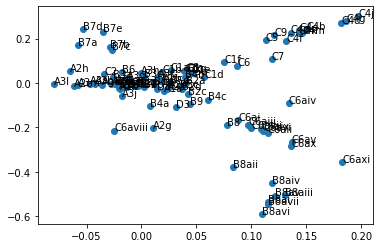

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

for i, txt in enumerate(question_id):
    ax.annotate(txt, (X[i,0], X[i,1]))


# 5. K-means 
Clustering to identify who clusters with the target variable (what question answer is clustered with target variable: B3b)

In [ ]:
from pyspark.ml import clustering 
from pyspark.ml.linalg import Vectors

In [ ]:
kmeans = Pipeline(stages=[pipeline, clustering.KMeans(k=10, featuresCol='norm_tfidf', predictionCol='cluster')]).fit(questionkey)

In [ ]:
kmeans.transform(questionkey).where(fn.col('Question ID') == 'B3b').first()[-1] 

7

In [ ]:
df = kmeans.transform(questionkey).toPandas()

In [ ]:
cluster = df.loc[df['cluster'] == 7]

In [ ]:
@fn.udf(returnType=types.ArrayType(types.FloatType()))
def to_array(col):
    return col.toArray().tolist()

In [ ]:
pca_2d = kmeans.transform(questionkey).select('Question ID', 'Cluster', 'filtered', to_array('pca_feat').alias('pc_array')).select('Cluster', 'Question ID', 'filtered', fn.expr('pc_array[0]').alias('pc1'), fn.expr('pc_array[1]').alias('pc2'))
pca_2d = pca_2d.toPandas()
pca_2d.head()

,Cluster,Question ID,filtered,pc1,pc2
0,1,A1a,"[indicate, level, satisfaction, job, overall]",0.020225,-0.036175
1,1,A1b,"[indicate, level, satisfaction, agency, employer]",-0.019919,-0.026743
2,9,A2a,"[job, allows, utilise, skills, knowledge, abil...",0.023410,-0.028925
3,6,A2b,"[clear, duties, responsibilities]",0.019958,0.009367
4,1,A2c,"[understand, work, contributes, agency, object...",-0.061056,-0.012352


In [ ]:
pca_2d.to_csv('pca_2d.csv')

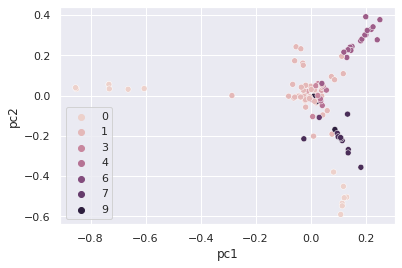

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
sns.scatterplot(data=pca_2d, x='pc1', y='pc2', hue=pca_2d.Cluster.tolist())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


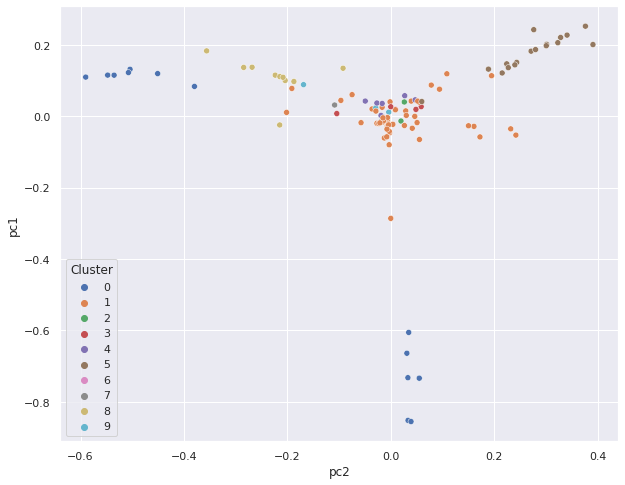

In [ ]:
x=pca_2d['pc2']
y=pca_2d['pc1']
n=pca_2d['Question ID']
plt.figure(figsize=(10,8))
sns.scatterplot(x, y, hue=pca_2d['Cluster'], palette= 'deep')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


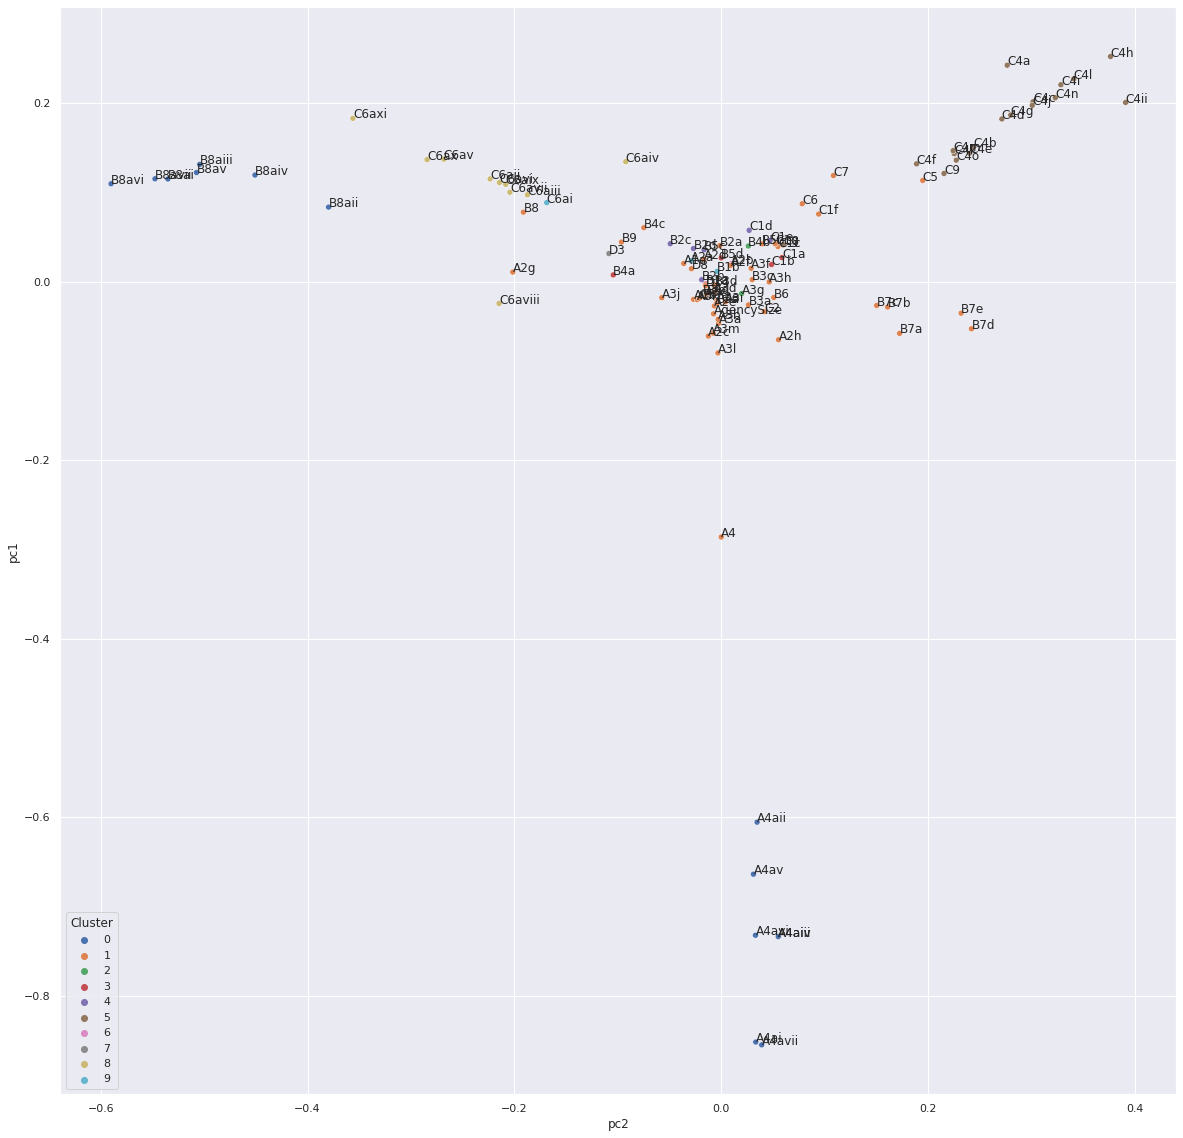

In [ ]:
x=pca_2d['pc2']
y=pca_2d['pc1']
n=pca_2d['Question ID']
plt.figure(figsize=(20,20))
sns.scatterplot(x, y, hue=pca_2d['Cluster'], palette= 'deep')

for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

# 6. LDA

In [ ]:
lda = Pipeline(stages=[pipeline, clustering.LDA(k=10, featuresCol='norm_tfidf', topicDistributionCol='lda_feat')]).fit(questionkey)

In [ ]:
lda_model = lda.stages[-1]
lda_model.describeTopics(maxTermsPerTopic=10).select('termIndices').show()

+--------------------+
|         termIndices|
+--------------------+
|[11, 13, 12, 10, ...|
|[19, 291, 257, 20...|
|[3, 2, 8, 7, 9, 5...|
|[57, 254, 337, 27...|
|[18, 21, 39, 239,...|
|[314, 168, 150, 6...|
|[186, 102, 35, 62...|
|[117, 118, 261, 7...|
|[76, 354, 43, 46,...|
|[0, 24, 16, 26, 2...|
+--------------------+



In [ ]:
terms_matrix = np.array(lda_model.describeTopics(10).rdd.map(lambda x: x['termIndices']).collect())

In [ ]:
vocabulary = pipeline.stages[2].vocabulary

In [ ]:
np.array(vocabulary)[terms_matrix]
#10 topics and their top keywords 

array([['experienced', 'nature', 'describes', 'bullying', 'yes',
        'following', 'form', 'frightening', 'humiliating', 'screaming'],
       ['meetings', 'intoxication', 'degrading', 'aggressive', 'holding',
        'honesty', 'culture', 'suitable', 'including', 'attachment'],
       ['behaviour', 'workplace', 'witnessed', 'unethical', 'types',
        'report', 'months', 'following', 'information', 'did'],
       ['decisions', 'fair', 'recruitment', 'promotion', 'directly',
        'adequately', 'overall', 'sought', 'objectives', 'honesty'],
       ['supervisor', 'immediate', 'group', 'impacting', 'performance',
        'business', 'communicates', 'risks', 'work', 'effectively'],
       ['health', 'actively', 'wellbeing', 'ethical', 'encourages',
        'committed', 'employees', 'headcount', 'size', 'behaviour'],
       ['highest', 'objectives', 'level', 'achieve', 'satisfaction',
        'motivates', 'education', 'overall', 'indicate', 'treat'],
       ['honesty', 'integrity', '

In [ ]:
lda.transform(questionkey).where(fn.col('Question ID') == 'B3b').first()['lda_feat']
#Topic 4 

DenseVector([0.0287, 0.0273, 0.0308, 0.0276, 0.7396, 0.0286, 0.0281, 0.0282, 0.0283, 0.0328])

# 7. Random Forest

# 8. Association Rules Mining
